<a href="https://colab.research.google.com/github/lynnkuan/python/blob/main/2330%EF%BC%ADomentum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('2330TEJ.csv')
data.head()

,date,1M_high,3M_high,6M_high,9M_high,1Y_high,1M_low,3M_low,6M_low,9M_low,...,SMA_750d,SMA_1250d,SMA_2500d,vol_55d_max,vol_65d_max,vol_240d_max,extra_1,extra_2,extra_3,extra_4
0,2024-10-18,1085.0,1085.0000,1085.0000,1085.0000,1085.0000,957.0,811.3724,735.8533,617.9290,...,4.711156e+07,4.674301e+07,4.313762e+07,3.363233e+07,2.272338e+07,2.140464e+07,1.384897e+07,159662.795,159662.795,176166.037
1,2024-10-17,1070.0,1070.0000,1075.1929,1075.1929,1075.1929,941.0,811.3724,735.8533,580.4189,...,4.639698e+07,4.573941e+07,4.268644e+07,3.328967e+07,2.260421e+07,2.132834e+07,1.381084e+07,159662.795,159662.795,176166.037
2,2024-10-16,1070.0,1070.0000,1075.1929,1075.1929,1075.1929,941.0,811.3724,735.8533,573.5092,...,4.631153e+07,4.520412e+07,4.248195e+07,3.311630e+07,2.253870e+07,2.129197e+07,1.379059e+07,159662.795,159662.795,176166.037
3,2024-10-15,1070.0,1070.0000,1075.1929,1075.1929,1075.1929,941.0,811.3724,735.8533,572.5221,...,4.620621e+07,4.490201e+07,4.218943e+07,3.290072e+07,2.246822e+07,2.124772e+07,1.376794e+07,159662.795,159662.795,176166.037
4,2024-10-14,1045.0,1050.3042,1075.1929,1075.1929,1075.1929,941.0,811.3724,735.8533,572.5221,...,4.607861e+07,4.467899e+07,4.192664e+07,3.273591e+07,2.241006e+07,2.120631e+07,1.374866e+07,159662.795,159662.795,176166.037


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 72 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          300 non-null    object 
 1   1M_high       300 non-null    float64
 2   3M_high       300 non-null    float64
 3   6M_high       300 non-null    float64
 4   9M_high       300 non-null    float64
 5   1Y_high       300 non-null    float64
 6   1M_low        300 non-null    float64
 7   3M_low        300 non-null    float64
 8   6M_low        300 non-null    float64
 9   9M_low        300 non-null    float64
 10  55d_SMA       300 non-null    float64
 11  65d_SMA       300 non-null    int64  
 12  72d_SMA       300 non-null    float64
 13  125d_SMA      300 non-null    float64
 14  250d_SMA      300 non-null    float64
 15  750d_SMA      300 non-null    float64
 16  1250d_SMA     300 non-null    float64
 17  2500d_SMA     300 non-null    float64
 18  vol_55d       300 non-null    

In [6]:
data.rename(columns={'65d_SMA':'price'},inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 72 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          300 non-null    object 
 1   1M_high       300 non-null    float64
 2   3M_high       300 non-null    float64
 3   6M_high       300 non-null    float64
 4   9M_high       300 non-null    float64
 5   1Y_high       300 non-null    float64
 6   1M_low        300 non-null    float64
 7   3M_low        300 non-null    float64
 8   6M_low        300 non-null    float64
 9   9M_low        300 non-null    float64
 10  55d_SMA       300 non-null    float64
 11  price         300 non-null    int64  
 12  72d_SMA       300 non-null    float64
 13  125d_SMA      300 non-null    float64
 14  250d_SMA      300 non-null    float64
 15  750d_SMA      300 non-null    float64
 16  1250d_SMA     300 non-null    float64
 17  2500d_SMA     300 non-null    float64
 18  vol_55d       300 non-null    

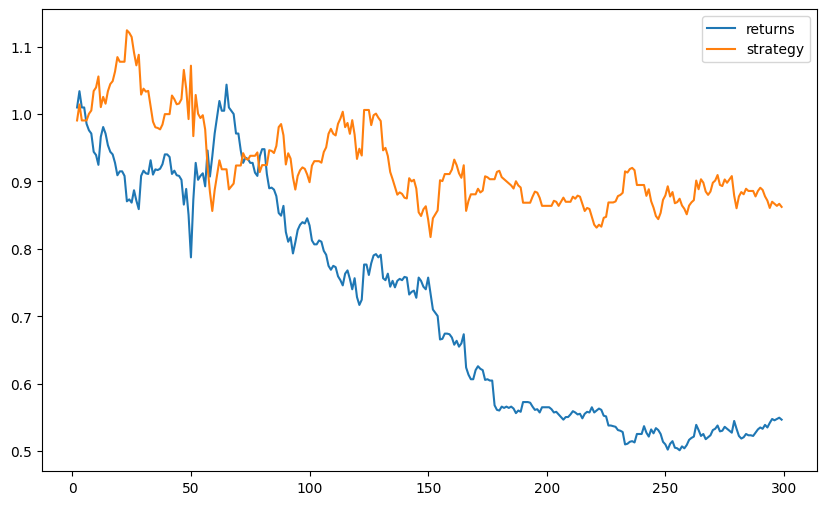

In [8]:
data['returns'] = np.log(data['price']/data['price'].shift(1))
data['position'] = np.sign(data['returns'])   #辨識1or-1
data['strategy'] = data['position'].shift(1)*data['returns']    #策略報酬率
data[['returns','strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10,6))  #根據前一次報酬建立部位
plt.show()

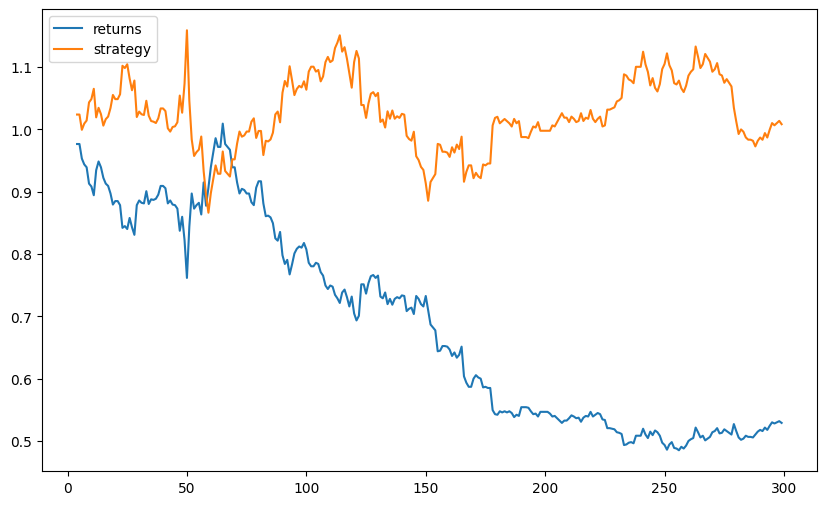

In [9]:
data['position'] = np.sign(data['returns'].rolling(3).mean())   #辨識1or-1
data['strategy'] = data['position'].shift(1)*data['returns']    #策略報酬率
data[['returns','strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10,6))  #根據前一次報酬建立部位
plt.show()

In [10]:
data.rename(columns={'72d_SMA':'averageprice'},inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 75 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          300 non-null    object 
 1   1M_high       300 non-null    float64
 2   3M_high       300 non-null    float64
 3   6M_high       300 non-null    float64
 4   9M_high       300 non-null    float64
 5   1Y_high       300 non-null    float64
 6   1M_low        300 non-null    float64
 7   3M_low        300 non-null    float64
 8   6M_low        300 non-null    float64
 9   9M_low        300 non-null    float64
 10  55d_SMA       300 non-null    float64
 11  price         300 non-null    int64  
 12  averageprice  300 non-null    float64
 13  125d_SMA      300 non-null    float64
 14  250d_SMA      300 non-null    float64
 15  750d_SMA      300 non-null    float64
 16  1250d_SMA     300 non-null    float64
 17  2500d_SMA     300 non-null    float64
 18  vol_55d       300 non-null    

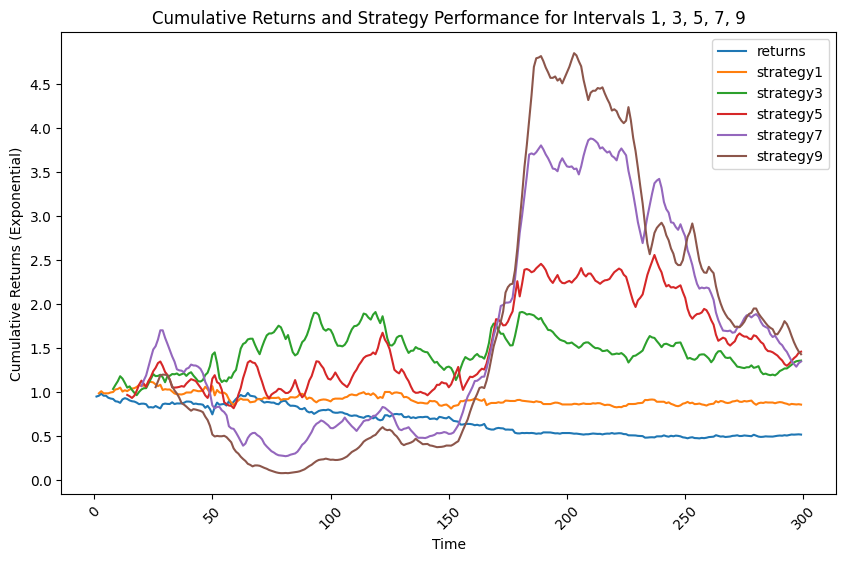

In [19]:
for i in [1, 3, 5, 7, 9]:
    data[f'position{i}'] = np.sign(data[f'returns{i}'].rolling(i).mean())
    data[f'strategy{i}'] = data[f'position{i}'].shift(i) * data[f'returns{i}']

plt.figure(figsize=(10, 6))
plt.plot(data['returns'].dropna().cumsum().apply(np.exp), label='returns')

for i in [1, 3, 5, 7, 9]:
    plt.plot(data[f'strategy{i}'].dropna().cumsum().apply(np.exp), label=f'strategy{i}')


plt.title('Cumulative Returns and Strategy Performance for Intervals 1, 3, 5, 7, 9')
plt.xlabel('Time')
plt.ylabel('Cumulative Returns (Exponential)')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 5, 0.5))

plt.legend()
plt.show()